# An√°lisis de la demanda de talles y comportamiento de compra por provincias de Tochana

**Fecha: Marzo-Julio 2025**

**Alumna: Carvajal Ceci, Katja**

**Dataset: Ventas Tochana 6/2023 - 6/2024 (mercadolibre) y Datos de contacto de compradores hist√≥ricos (sitio web)**

1.  ORIGEN DE LOS DATOS

La informaci√≥n utilizada para el an√°lisis del presente proviene de la plataforma de comercio electr√≥nico Mercado Libre, espec√≠ficamente de la marca de indumentaria femenina Tochana. Esta marca se caracteriza por ofrecer una amplia curva de talles que abarca desde el talle M hasta el 5XL, destac√°ndose por atender un segmento poco explorado en el mercado de ropa femenina. El per√≠odo de an√°lisis comprende desde el 06 de junio de 2023 hasta el 06 de junio de 2024, e incluye datos detallados de cada transacci√≥n realizada en ese intervalo. Entre los datos recopilados se encuentran: descripci√≥n del producto, talle, precio y datos del comprador. Todas las transacciones analizadas corresponden exclusivamente a operaciones realizadas dentro del territorio argentino. Adem√°s se agrega para el an√°lisis geogr√°fico la base de datos del sitio web de la marca de donde se destacan la localidad de los compradores. Dicha base de datos no se considera hist√≥rica por la marca, debido que se construy√≥ cuando comenz√≥ la venta online en el a√±o 2021 hasta Abril 2025.

2.  PREGUNTAS DE INTERES

*   ¬øCu√°l es el talle m√°s vendido a nivel nacional?

    *  ¬øExisten diferencias significativas en la venta de talles grandes (2XL, 3XL, 4XL y 5XL) y peque√±os (M, L, XL)?

*  ¬øQu√© provincias presentan la mayor cantidad de ventas?

  *  ¬øLas zonas con m√°s ventas tambi√©n tienen mayores ingresos totales?

  *  ¬øExisten diferencias en la demanda de talles grandes o peque√±os seg√∫n la provincia?

*  ¬øD√≥nde se observa la mayor fidelidad de los clientes (frecuencia de compra alta)?

*  ¬øHay diferencias entre las zonas con mayores ventas entre la web y la plataforma de mercadolibre?

3. HIP√ìTESIS


*Preferencia por talles grandes:* Dada la limitada oferta de talles grandes en el mercado y la extensa curva de talles ofrecida por Tochana, se espera que los talles m√°s grandes (2XL, 3XL, 4XL y 5XL) sean los m√°s demandados en comparaci√≥n con los talles m√°s peque√±os (S, M, L, XL), que enfrentan una mayor competencia en el mercado.

*Variaci√≥n regional de la demanda:* Se espera que la demanda de los productos de la marca Tochana en las provincias del interior muestren mayores tasas de fidelidad por menor competencia local

# SENTENCIAS

In [1]:
#importo las librer√≠as a usar

# Bibliotecas para manejo de datos y operaciones matem√°ticas
import pandas as pd
import numpy as np

# Bibliotecas para visualizaci√≥n de datos
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV



In [2]:
colores_marca = ['#1a5e63', '#f3a916', '#faf4d3', '#f6be9a']

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
archivo_excel = '/content/drive/MyDrive/Data Scientist /Data Science II/Proyecto/Ventas Tochana 2023_2024.xlsx'
df = pd.read_excel(archivo_excel)

In [5]:
archivo_excel = '/content/drive/MyDrive/Data Scientist /Data Science II/Proyecto/Clientes web 2021 2025.xlsx'
dfweb = pd.read_excel(archivo_excel)

# **An√°lisis exploratorio de la base de datos de ventas de Mercadolibre**

In [6]:
#Veo el tama√±o del dataset de ventas
df.shape

(3508, 9)

In [7]:
#Veo que tipo de datos para cada columna
df.dtypes

ID_venta                          int64
ID_clientes                      object
Ingresos por productos (ARS)    float64
Cargo por venta e impuestos     float64
Costos de env√≠o                 float64
Total (ARS)                     float64
ID_publicaciones                 object
ID_Color                        float64
ID_Talle                        float64
dtype: object

In [8]:
#Obtengo una vista general del dataset
display(df.head())

ID_venta  ID_clientes  Ingresos por productos (ARS)  \
0  2000008457000154     31474330                      29999.00   
1  2000008456300770  27277464018                      30689.07   
2  2000008455133668     31474330                      29999.00   
3  2000008454386024     20475232                      28999.00   
4  2000008454078018     39089306                      30599.10   

   Cargo por venta e impuestos  Costos de env√≠o  Total (ARS) ID_publicaciones  \
0                     -5347.32         -4182.99     20468.69     MLA667305456   
1                     -5009.99         -4182.99     21496.09    MLA1374337563   
2                     -5347.32         -4182.99         0.00     MLA667305456   
3                     -4734.08         -4182.99     20081.93    MLA1141435462   
4                     -4995.30         -4182.99     21420.81     MLA920008017   

   ID_Color  ID_Talle  
0       1.0       6.0  
1       2.0       8.0  
2       3.0       6.0  
3       4.0       7.0  
4       5.0       8.0

In [9]:
print(df.columns)

Index(['ID_venta', 'ID_clientes', 'Ingresos por productos (ARS)',
       'Cargo por venta e impuestos', 'Costos de env√≠o', 'Total (ARS)',
       'ID_publicaciones', 'ID_Color', 'ID_Talle'],
      dtype='object')


In [10]:
#Leo el Excel e imprimo los nombres de las hojas disponibles del archivo
archivo_excel = '/content/drive/MyDrive/Data Scientist /Data Science II/Proyecto/Ventas Tochana 2023_2024.xlsx'

dfs = pd.read_excel(archivo_excel, sheet_name=None)

print(dfs.keys())

dict_keys(['Ventas', 'Publicaciones', 'Categor√≠a', 'Talle', 'Color', 'Clientes', 'Ciudad', 'Provincia'])


El dataset utilizado cuenta con ocho solapas:

Ventas

Publicaciones

Categor√≠a

Talle

Color

Clientes

Ciudad

Provincia

Transform√© cada una en un dataframe para poder utilizarlos a lo largo del an√°lisis

In [11]:
df_ventas = dfs['Ventas']
df_publicaciones = dfs['Publicaciones']
df_categoria = dfs['Categor√≠a']
df_talle = dfs['Talle']
df_color = dfs['Color']
df_clientes = dfs['Clientes']
df_ciudad = dfs['Ciudad']
df_provincia = dfs['Provincia']

In [12]:
display("Ventas:")
display(df_ventas.head())
display("\nPublicaciones:")
display(df_publicaciones.head())
display("\nCategor√≠a:")
display(df_categoria.head())
display("\nTalle:")
display(df_talle.head())
display("\nColor:")
display(df_color.head())
display("\nClientes:")
display(df_clientes.head())
display("\nCiudad:")
display(df_ciudad.head())
display("\nProvincia:")
display(df_provincia.head())

'Ventas:'

ID_venta  ID_clientes  Ingresos por productos (ARS)  \
0  2000008457000154     31474330                      29999.00   
1  2000008456300770  27277464018                      30689.07   
2  2000008455133668     31474330                      29999.00   
3  2000008454386024     20475232                      28999.00   
4  2000008454078018     39089306                      30599.10   

   Cargo por venta e impuestos  Costos de env√≠o  Total (ARS) ID_publicaciones  \
0                     -5347.32         -4182.99     20468.69     MLA667305456   
1                     -5009.99         -4182.99     21496.09    MLA1374337563   
2                     -5347.32         -4182.99         0.00     MLA667305456   
3                     -4734.08         -4182.99     20081.93    MLA1141435462   
4                     -4995.30         -4182.99     21420.81     MLA920008017   

   ID_Color  ID_Talle  
0       1.0       6.0  
1       2.0       8.0  
2       3.0       6.0  
3       4.0       7.0  
4       5.0       8.0

'\nPublicaciones:'

id_publicacion                                             T√≠tulo  \
0      1108231655  Vestido Largo Cruzado Seda Fria Talles Grandes...   
1       886360539  Vestido Largo More Con Bolsillos Talles Grande...   
2      1117143028  Vestido More Corto Seda Fria Talles Grandes Y ...   
3       830849228  Vestido Luce Manga Corta Con Bolsillos Talles ...   
4       914742415  Pantalon Bengalina Super Elastizada Talle Gran...   

   id_categor√≠a  Visitas totales  Ventas totales  
0             1            90189            1651  
1             1            32165             817  
2             1            29172             566  
3             1            16596             476  
4             2            15808             476

'\nCategor√≠a:'

id_categor√≠a               Nombre_categoria
0             1                       Vestidos
1             2                     Pantalones
2             3  Remeras, Musculosas y Chombas
3             4                Buzos y Hoodies
4             5    Camperas, Tapados y Trenchs

'\nTalle:'

ID_Talle nombre_Talle
0         1            S
1         2            M
2         3            L
3         4           XL
4         5          2XL

'\nColor:'

ID_Color    nombre_Color
0         1     Azul marino
1         2            Aero
2         3  Bord√≥ ( MODAL)
3         4            Gris
4         5         Borgo√±a

'\nClientes:'

id_cliente Primer nombre Segundo nombre   Apellido  Id_Ciudad  \
0     31474330         Irene       Claudina    Mendoza        1.0   
1  27277464018       Valeria        Soledad   Casanova        2.0   
2     20475232         Julio           Cesa  Rodriguez        3.0   
3     39089306         Paula          Valle    Benitez        4.0   
4     43339445        Brenda          Suyai   Espinoza        5.0   

   C√≥digo postal  
0         3040.0  
1         2820.0  
2         1885.0  
3         5600.0  
4         8300.0

'\nCiudad:'

Id_Ciudad              Ciudad id_provincia
0          1           San Justo            1
1          2        Gualeguaych√∫            2
2          3  Guillermo E Hudson            3
3          4           Las Heras            4
4          5             Neuqu√©n            5

'\nProvincia:'

id_provincia      Provincia
0             1      Santa Fe 
1             2    Entre R√≠os 
2             3  Buenos Aires 
3             4       Mendoza 
4             5       Neuquen

In [13]:
print(df_ventas.columns)
print(df_talle.columns)

Index(['ID_venta', 'ID_clientes', 'Ingresos por productos (ARS)',
       'Cargo por venta e impuestos', 'Costos de env√≠o', 'Total (ARS)',
       'ID_publicaciones', 'ID_Color', 'ID_Talle'],
      dtype='object')
Index(['ID_Talle', 'nombre_Talle'], dtype='object')


In [14]:
# Relacion talle / ingresos
ventas_talle = df_ventas.merge(df_talle, on='ID_Talle', how='left')
ventas_por_talle = ventas_talle.groupby('nombre_Talle')['Ingresos por productos (ARS)'].sum().reset_index()
ventas_por_talle = ventas_por_talle.sort_values(by='Ingresos por productos (ARS)', ascending=False)

ventas_por_talle


nombre_Talle  Ingresos por productos (ARS)
3          5XL                   20200062.41
2          4XL                   10349461.01
1          3XL                    7656586.20
0          2XL                    6175686.50
7           XL                    4640499.28
4            L                    1982458.00
5            M                    1169066.79
6            S                      73995.00

**¬øCu√°l es el talle m√°s vendido a nivel nacional?**

In [15]:
ventas_talle = df_ventas.merge(df_talle, on='ID_Talle', how='left')
ventas_por_talle = ventas_talle.groupby('nombre_Talle').size().reset_index(name='Unidades_vendidas')

# Ordeno de mayor a menor para una visualizacion mas clara
ventas_por_talle = ventas_por_talle.sort_values(by='Unidades_vendidas', ascending=False)

ventas_por_talle


nombre_Talle  Unidades_vendidas
3          5XL               1055
2          4XL                663
1          3XL                512
0          2XL                410
7           XL                281
5            M                129
4            L                121
6            S                  8

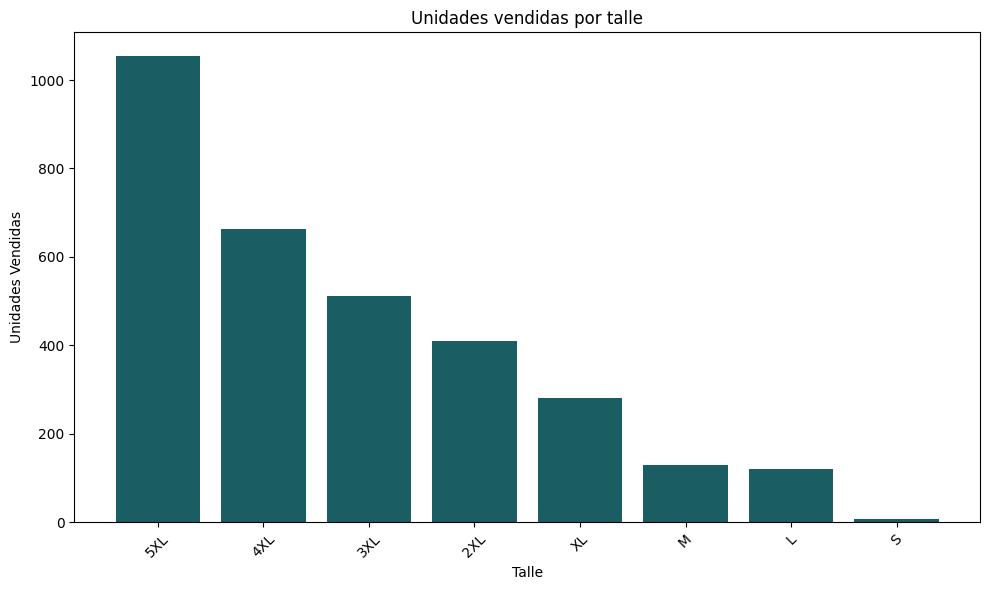

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(ventas_por_talle['nombre_Talle'],
        ventas_por_talle['Unidades_vendidas'],
        color=colores_marca[0])
plt.xlabel('Talle')
plt.ylabel('Unidades Vendidas')
plt.title('Unidades vendidas por talle')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
print(df_clientes.columns)
print(df_ventas.columns)
print(df_provincia.columns)

Index(['id_cliente', 'Primer nombre', 'Segundo nombre', 'Apellido',
       'Id_Ciudad', 'C√≥digo postal'],
      dtype='object')
Index(['ID_venta', 'ID_clientes', 'Ingresos por productos (ARS)',
       'Cargo por venta e impuestos', 'Costos de env√≠o', 'Total (ARS)',
       'ID_publicaciones', 'ID_Color', 'ID_Talle'],
      dtype='object')
Index(['id_provincia', 'Provincia'], dtype='object')


In [18]:
df_ventas['ID_clientes'] = pd.to_numeric(df_ventas['ID_clientes'], errors='coerce')
df_ventas_clientes = df_ventas.merge(df_clientes, left_on='ID_clientes', right_on='id_cliente')
df_ventas_ciudad = df_ventas_clientes.merge(df_ciudad, left_on='Id_Ciudad', right_on='Id_Ciudad')
df_ventas_provincia = df_ventas_ciudad.merge(df_provincia, left_on='id_provincia', right_on='id_provincia')

**¬øQu√© provincias presentan la mayor cantidad de ventas?**

/tmp/ipython-input-1262378564.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_por_provincia, x='Total (ARS)', y='Provincia', palette=colores_marca)
/tmp/ipython-input-1262378564.py:6: UserWarning: 
The palette list has fewer values (4) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ventas_por_provincia, x='Total (ARS)', y='Provincia', palette=colores_marca)


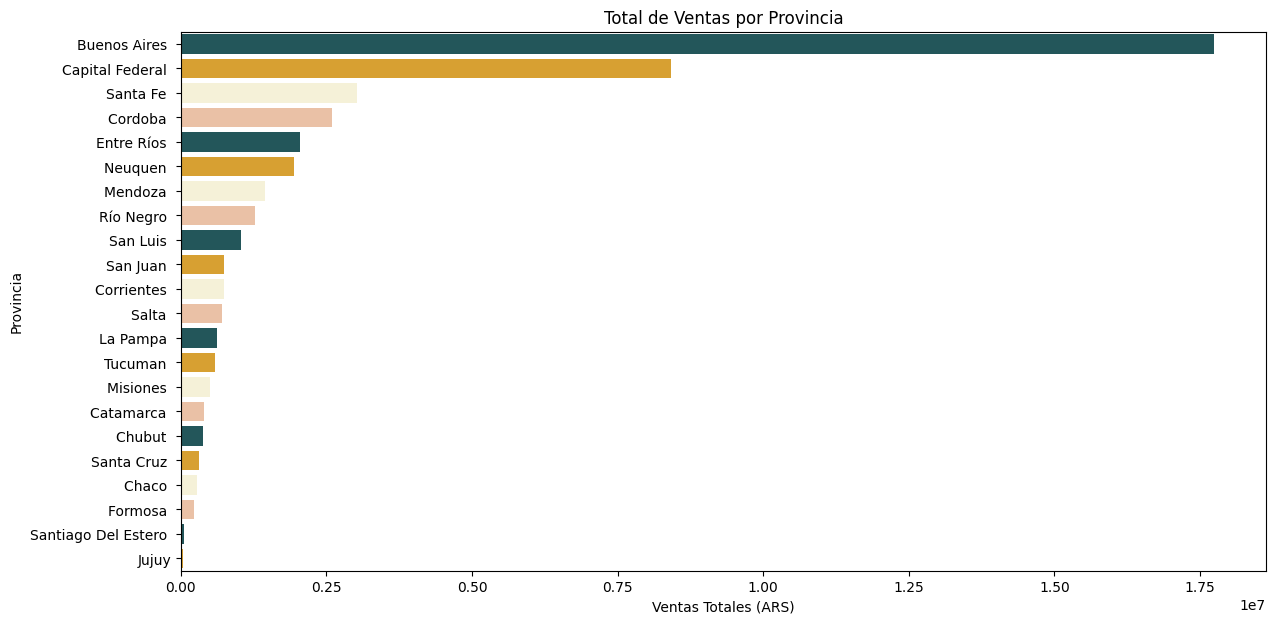

In [19]:

ventas_por_provincia = df_ventas_provincia.groupby('Provincia')['Total (ARS)'].sum().reset_index()

ventas_por_provincia = ventas_por_provincia.sort_values(by='Total (ARS)', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(data=ventas_por_provincia, x='Total (ARS)', y='Provincia', palette=colores_marca)
plt.title('Total de Ventas por Provincia')
plt.xlabel('Ventas Totales (ARS)')
plt.ylabel('Provincia')
plt.show()

In [20]:
ventas_por_provincia


Provincia  Total (ARS)
0          Buenos Aires   17744938.69
1       Capital Federal    8423509.51
19             Santa Fe    3015803.82
5               Cordoba    2601190.19
7            Entre R√≠os    2051316.93
13              Neuquen    1940519.50
11              Mendoza    1452353.81
14            R√≠o Negro    1268734.99
17             San Luis    1035122.72
16             San Juan     747597.88
6            Corrientes     744644.19
15                Salta     710101.17
10             La Pampa     626118.38
21              Tucuman     589589.33
12             Misiones     491656.79
2             Catamarca     395528.84
4                Chubut     372345.68
18           Santa Cruz     311910.92
3                 Chaco     282804.34
8               Formosa     222798.02
20  Santiago Del Estero      61275.90
9                  Jujuy     30267.83

El gr√°fico da cuenta de una mayor cantidad de ventas en la provincia de Buenos Aires en comparaci√≥n con el interior del pa√≠s en t√©rminos de ventas netas. Sin embargo es insuficiente para poner a prueba la hip√≥tesis de que en el intrior del pa√≠s m√°s gente por poblaci√≥n elije la marca debido a la poca oferta ya que el gr√°fico no toma en cuenta la densidad demogr√°fica. Por lo cu√°l se profundiza el an√°lisis con tal fin tomando en cuenta los datos del √∫ltimo Censo llevado a cabo en Argentina en el a√±o 2022.

Obs.: Informacion extra√≠da desde https://www.indec.gob.ar/indec/web/Nivel4-Tema-2-41-165

In [21]:
data = {
    'Provincia': [
        'Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
        'Cordoba', 'Corrientes', 'Entre R√≠os', 'Formosa', 'Jujuy',
        'La Pampa', 'Mendoza', 'Misiones', 'Neuquen',
        'R√≠o Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
        'Santa Fe', 'Santiago Del Estero', 'Tucuman'
    ],
    'Poblacion': [
        17569677, 3169990, 433764, 1153818, 618746,
        3973160, 1099423, 1290975, 600702, 769634,
        371216, 1886503, 1164827, 771653,
        748056, 1357012, 825144, 477424, 273964,
        3670575, 1043821, 1604886
    ]
}

df_poblacion = pd.DataFrame(data)

display(df_poblacion)

Provincia  Poblacion
0          Buenos Aires   17569677
1       Capital Federal    3169990
2             Catamarca     433764
3                 Chaco    1153818
4                Chubut     618746
5               Cordoba    3973160
6            Corrientes    1099423
7            Entre R√≠os    1290975
8               Formosa     600702
9                 Jujuy     769634
10             La Pampa     371216
11              Mendoza    1886503
12             Misiones    1164827
13              Neuquen     771653
14            R√≠o Negro     748056
15                Salta    1357012
16             San Juan     825144
17             San Luis     477424
18           Santa Cruz     273964
19             Santa Fe    3670575
20  Santiago Del Estero    1043821
21              Tucuman    1604886

In [22]:
ventas_por_provincia['Provincia'] = ventas_por_provincia['Provincia'].str.strip() #utilic√© el "strip" para eliminar los espacios en blanco porque no me coincidian los nombres en ambos dataframe
df_poblacion['Provincia'] = df_poblacion['Provincia'].str.strip()

ventas_con_poblacion = ventas_por_provincia.merge(df_poblacion, on='Provincia', how='left')

display(ventas_con_poblacion)


Provincia  Total (ARS)  Poblacion
0          Buenos Aires  17744938.69   17569677
1       Capital Federal   8423509.51    3169990
2              Santa Fe   3015803.82    3670575
3               Cordoba   2601190.19    3973160
4            Entre R√≠os   2051316.93    1290975
5               Neuquen   1940519.50     771653
6               Mendoza   1452353.81    1886503
7             R√≠o Negro   1268734.99     748056
8              San Luis   1035122.72     477424
9              San Juan    747597.88     825144
10           Corrientes    744644.19    1099423
11                Salta    710101.17    1357012
12             La Pampa    626118.38     371216
13              Tucuman    589589.33    1604886
14             Misiones    491656.79    1164827
15            Catamarca    395528.84     433764
16               Chubut    372345.68     618746
17           Santa Cruz    311910.92     273964
18                Chaco    282804.34    1153818
19              Formosa    222798.02     600702
20  Santiago Del Estero     61275.90    1043821
21                Jujuy     30267.83     769634

In [23]:
ventas_con_poblacion['Ventas por Habitante'] = ventas_con_poblacion['Total (ARS)'] / ventas_con_poblacion['Poblacion']

In [24]:
Ventas_con_poblacion = ventas_con_poblacion.sort_values(by='Ventas por Habitante', ascending=False)

/tmp/ipython-input-1321930039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_con_poblacion, x='Provincia', y='Ventas por Habitante', palette=colores_marca)
/tmp/ipython-input-1321930039.py:3: UserWarning: 
The palette list has fewer values (4) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ventas_con_poblacion, x='Provincia', y='Ventas por Habitante', palette=colores_marca)


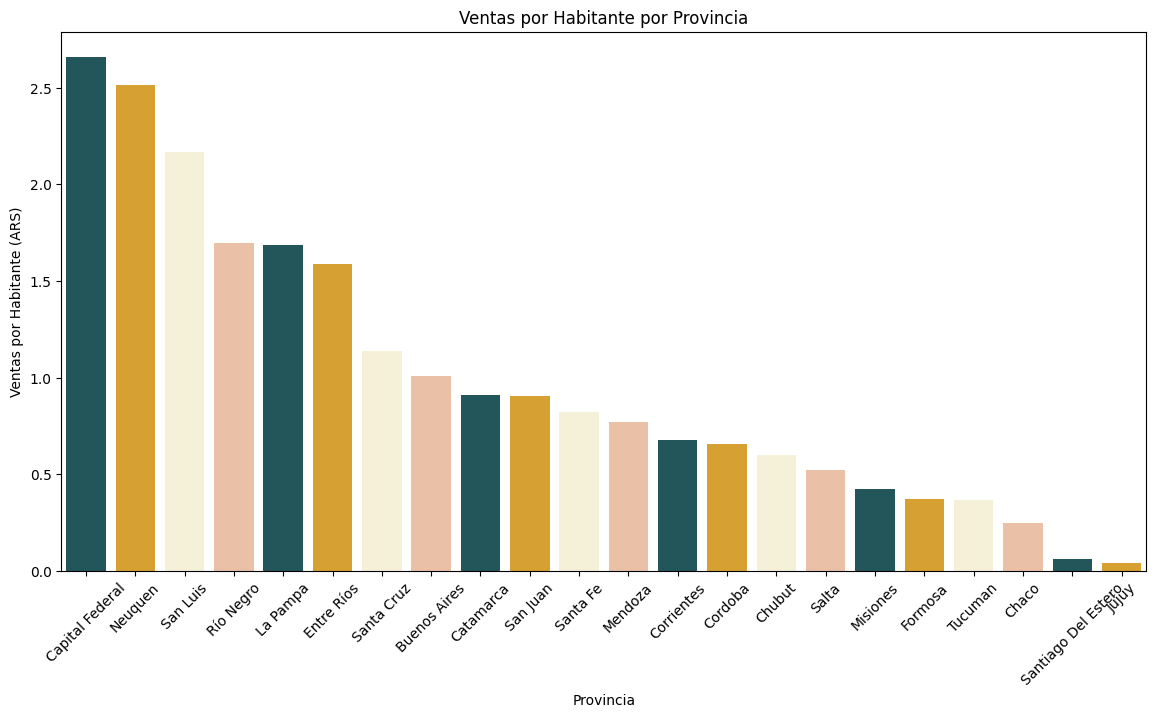

In [25]:
ventas_con_poblacion = ventas_con_poblacion.sort_values(by='Ventas por Habitante', ascending=False)
plt.figure(figsize=(14, 7))
sns.barplot(data=ventas_con_poblacion, x='Provincia', y='Ventas por Habitante', palette=colores_marca)
plt.title('Ventas por Habitante por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Ventas por Habitante (ARS)')
plt.xticks(rotation=45)
plt.show()

Se observa que al introducir la densidad demogr√°fica como variante de an√°lisis las ventas por provincias var√≠an. Se puede observar como la Provincia de Buenos Aires que superaba en ventas al resto del pa√≠s qued√≥ por debajo de siete provincias. Siendo la Ciudad Aut√≥noma de Buenos Aires (CABA) el distrito que condensa la mayor cantida de ventas por habitante.

En t√©rminos anal√≠ticos a diferencia del gr√°fico anterior se puede ver que si analizamos a las ventas concretadas en Buenos Aires y CABA en comparaci√≥n con la suma del resto de las provincias se puede inferir que la mayor cantidad de ventas concretadas por cantidad de habitantes son en el interior del pa√≠s. En relaci√≥n a la hip√≥tesis planteada en terminos de competitividad sigue siendo posible pensar que en el interior del pa√≠s hay menor cantida de oferta de indumentaria femenina en talles reales por lo cu√°l mayor cantidad de personas eligen la marca.

In [26]:
df_ventas.columns = df_ventas.columns.str.lower()
df_talle.columns = df_talle.columns.str.lower()
df_clientes.columns = df_clientes.columns.str.lower()
df_ciudad.columns = df_ciudad.columns.str.lower()
df_provincia.columns = df_provincia.columns.str.lower()


**¬øLas zonas con m√°s ventas tambi√©n tienen mayores ingresos totales?**

In [27]:
ventas_clientes = df_ventas.merge(df_clientes, left_on='id_clientes', right_on='id_cliente', how='left')

ventas_clientes_ciudad = ventas_clientes.merge(df_ciudad, left_on='id_ciudad', right_on='id_ciudad', how='left')

ventas_full = ventas_clientes_ciudad.merge(df_provincia, left_on='id_provincia', right_on='id_provincia', how='left')

ventas_por_provincia = ventas_full.groupby('provincia').size().reset_index(name='cantidad_ventas')

ingresos_por_provincia = ventas_full.groupby('provincia')['total (ars)'].sum().reset_index(name='ingresos_totales')

zona_ventas_ingresos = ventas_por_provincia.merge(ingresos_por_provincia, on='provincia')


/tmp/ipython-input-3248936353.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


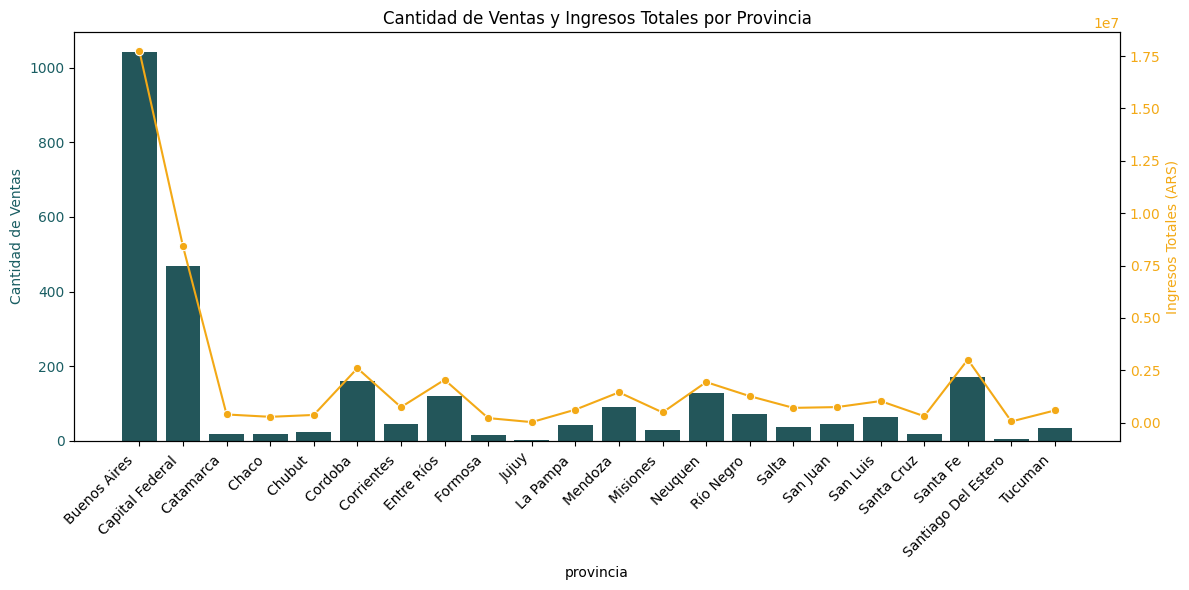

In [28]:
fig, ax1 = plt.subplots(figsize=(12,6))

sns.barplot(x='provincia', y='cantidad_ventas', data=zona_ventas_ingresos, color='#1a5e63', ax=ax1)
ax1.set_ylabel('Cantidad de Ventas', color='#1a5e63')
ax1.tick_params(axis='y', labelcolor='#1a5e63')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

ax2 = ax1.twinx()
sns.lineplot(x='provincia', y='ingresos_totales', data=zona_ventas_ingresos, color='#f3a916', marker='o', ax=ax2)
ax2.set_ylabel('Ingresos Totales (ARS)', color='#f3a916')
ax2.tick_params(axis='y', labelcolor='#f3a916')

plt.title('Cantidad de Ventas y Ingresos Totales por Provincia')
plt.tight_layout()
plt.show()


Existe una relaci√≥n directa entre cantida de ventas e ingresos

**¬øExisten diferencias en la demanda de talles grandes o chicos seg√∫n la provincia?**

In [29]:
#Agrego el dato del talle a la variable creada de ventas full
ventas_full_talle = ventas_full.merge(df_talle, left_on='id_talle', right_on='id_talle', how='left')


In [30]:
#Clasifico los talles chicos y los talles grandes para analizarlos en grupo
talles_chicos = ['M', 'L', 'XL']
talles_grandes = ['2XL', '3XL', '4XL','5XL']

def clasificar_talle(talle):
    if talle in talles_chicos:
        return 'Chico'
    elif talle in talles_grandes:
        return 'Grande'
    else:
        return 'Intermedio'

ventas_full_talle['categoria_talle'] = ventas_full_talle['nombre_talle'].apply(clasificar_talle)

ventas_por_provincia_talle = ventas_full_talle.groupby(['provincia', 'categoria_talle']).size().reset_index(name='cantidad_ventas')


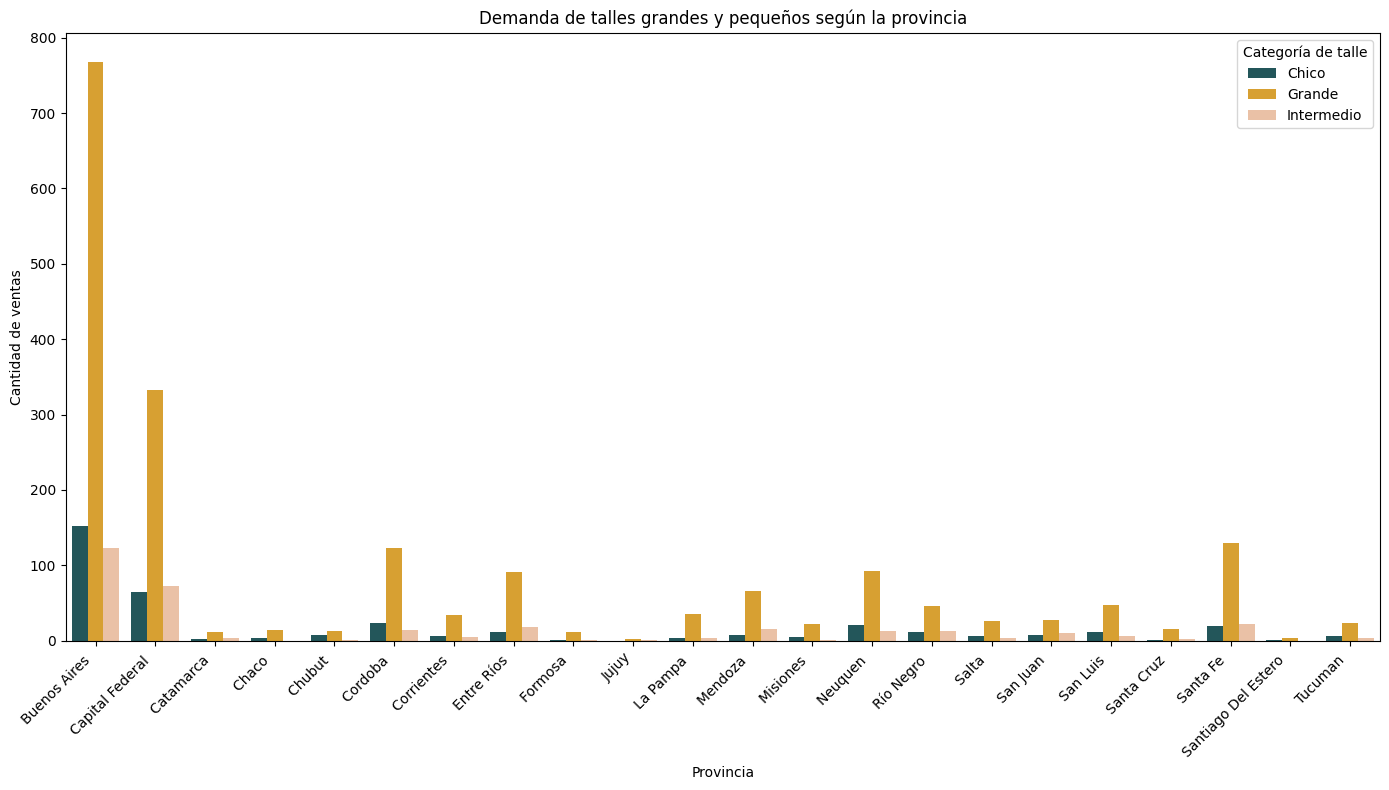

In [31]:
plt.figure(figsize=(14,8))
sns.barplot(x='provincia', y='cantidad_ventas', hue='categoria_talle', data=ventas_por_provincia_talle, palette=['#1a5e63', '#f3a916', '#f6be9a'])
plt.xticks(rotation=45, ha='right')
plt.title('Demanda de talles grandes y peque√±os seg√∫n la provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de ventas')
plt.legend(title='Categor√≠a de talle')
plt.tight_layout()
plt.show()


Se observa una tendencia en todas las provincias a los talles grandes, no se aprecian diferencias geograficas considerables

*  ¬øQu√© combinaci√≥n de talle y regi√≥n representa la mayor oportunidad de ventas para la marca?

In [32]:
# Agrupo por provincia y talle, contamos ventas
ventas_talle_provincia = ventas_full_talle.groupby(['provincia', 'nombre_talle']).size().reset_index(name='cantidad_ventas')

tabla_calor = ventas_talle_provincia.pivot(index='nombre_talle', columns='provincia', values='cantidad_ventas').fillna(0)



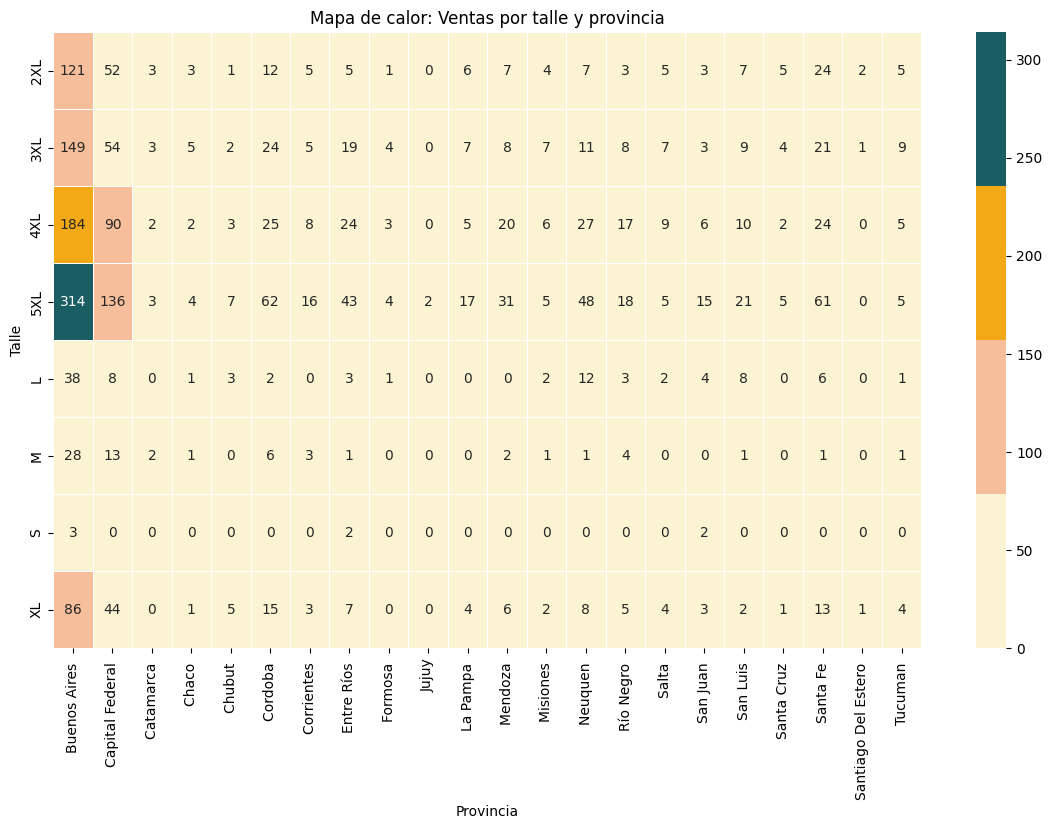

In [33]:
plt.figure(figsize=(14, 8))
sns.heatmap(tabla_calor, cmap=sns.color_palette(['#faf4d3', '#f6be9a', '#f3a916', '#1a5e63']), annot=True, fmt='.0f', linewidths=0.5)
plt.title('Mapa de calor: Ventas por talle y provincia')
plt.xlabel('Provincia')
plt.ylabel('Talle')
plt.show()


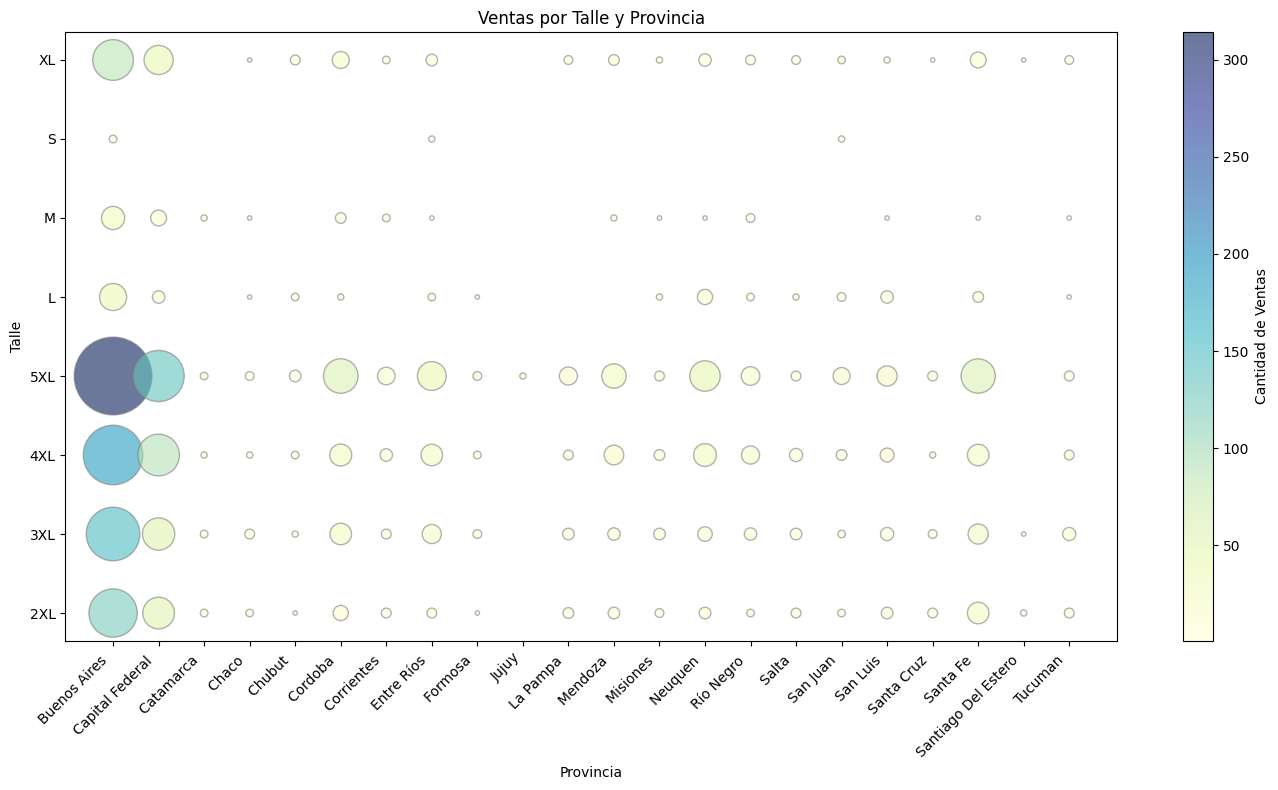

In [34]:
plt.figure(figsize=(14, 8))

# Debido a que hay mucha diferencias entre talles escalo los tama√±os de las burbujas para que no sean demasiado grandes
tamanio = ventas_talle_provincia['cantidad_ventas'] * 10

plt.scatter(
    ventas_talle_provincia['provincia'],
    ventas_talle_provincia['nombre_talle'],
    s=tamanio,
    c=ventas_talle_provincia['cantidad_ventas'],
    cmap='YlGnBu',
    alpha=0.6,
    edgecolors='grey'
)

plt.colorbar(label='Cantidad de Ventas')
plt.xlabel('Provincia')
plt.ylabel('Talle')
plt.title('Ventas por Talle y Provincia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**¬øD√≥nde se observa la mayor fidelidad de los clientes (frecuencia de compra alta)?**

In [35]:
# Calculo frecuencia de compra por cliente
frecuencia_clientes = ventas_full.groupby('id_clientes').size().reset_index(name='frecuencia_compra')
clientes_provincia = ventas_full[['id_clientes', 'provincia']].drop_duplicates(subset='id_clientes')
frecuencia_clientes = frecuencia_clientes.merge(clientes_provincia, on='id_clientes', how='left')


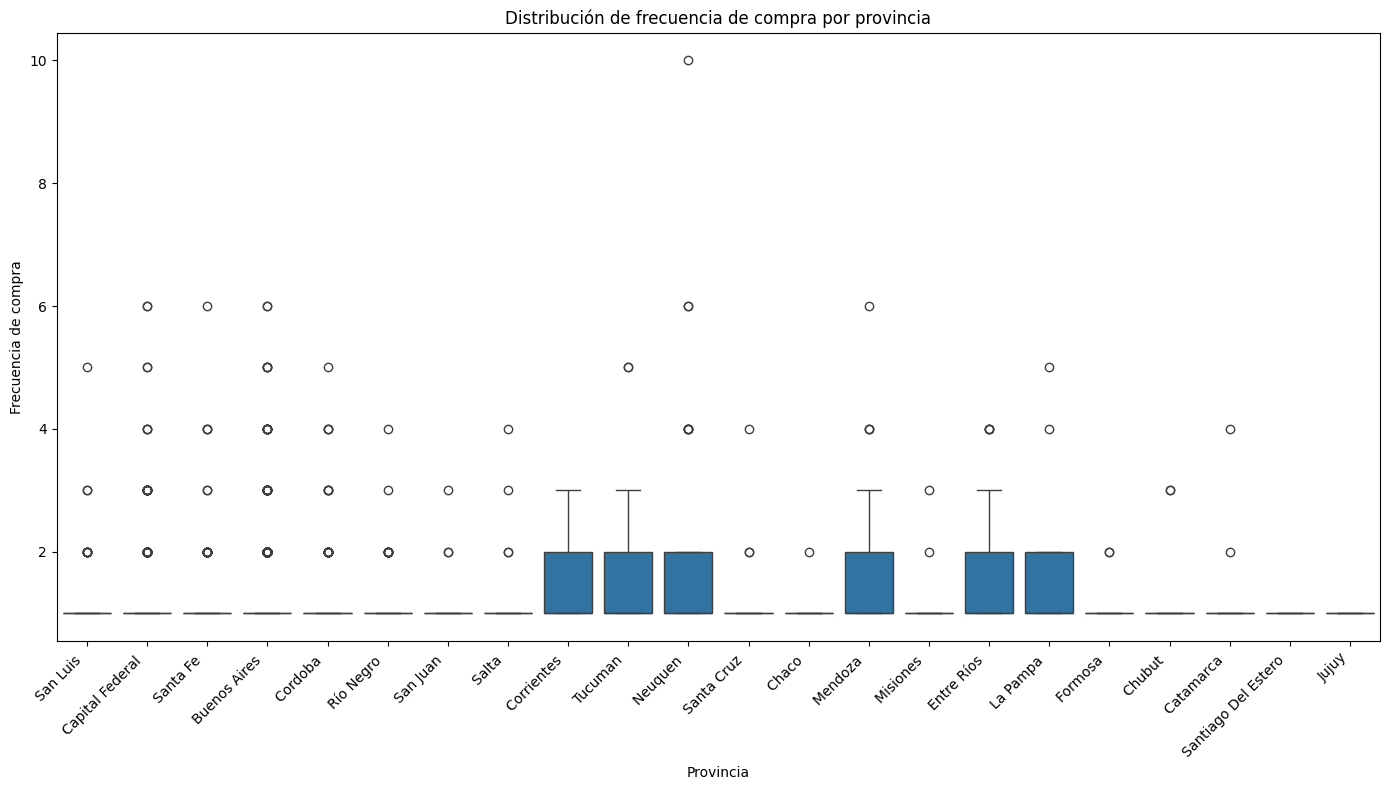

In [36]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=frecuencia_clientes, x='provincia', y='frecuencia_compra')
plt.xticks(rotation=45, ha='right')
plt.title('Distribuci√≥n de frecuencia de compra por provincia')
plt.ylabel('Frecuencia de compra')
plt.xlabel('Provincia')
plt.tight_layout()
plt.show()


/tmp/ipython-input-602072968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=frecuencia_clientes, x='provincia', y='frecuencia_compra', palette=['#1a5e63', '#f3a916', '#faf4d3', '#f6be9a'])
/tmp/ipython-input-602072968.py:2: UserWarning: 
The palette list has fewer values (4) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=frecuencia_clientes, x='provincia', y='frecuencia_compra', palette=['#1a5e63', '#f3a916', '#faf4d3', '#f6be9a'])


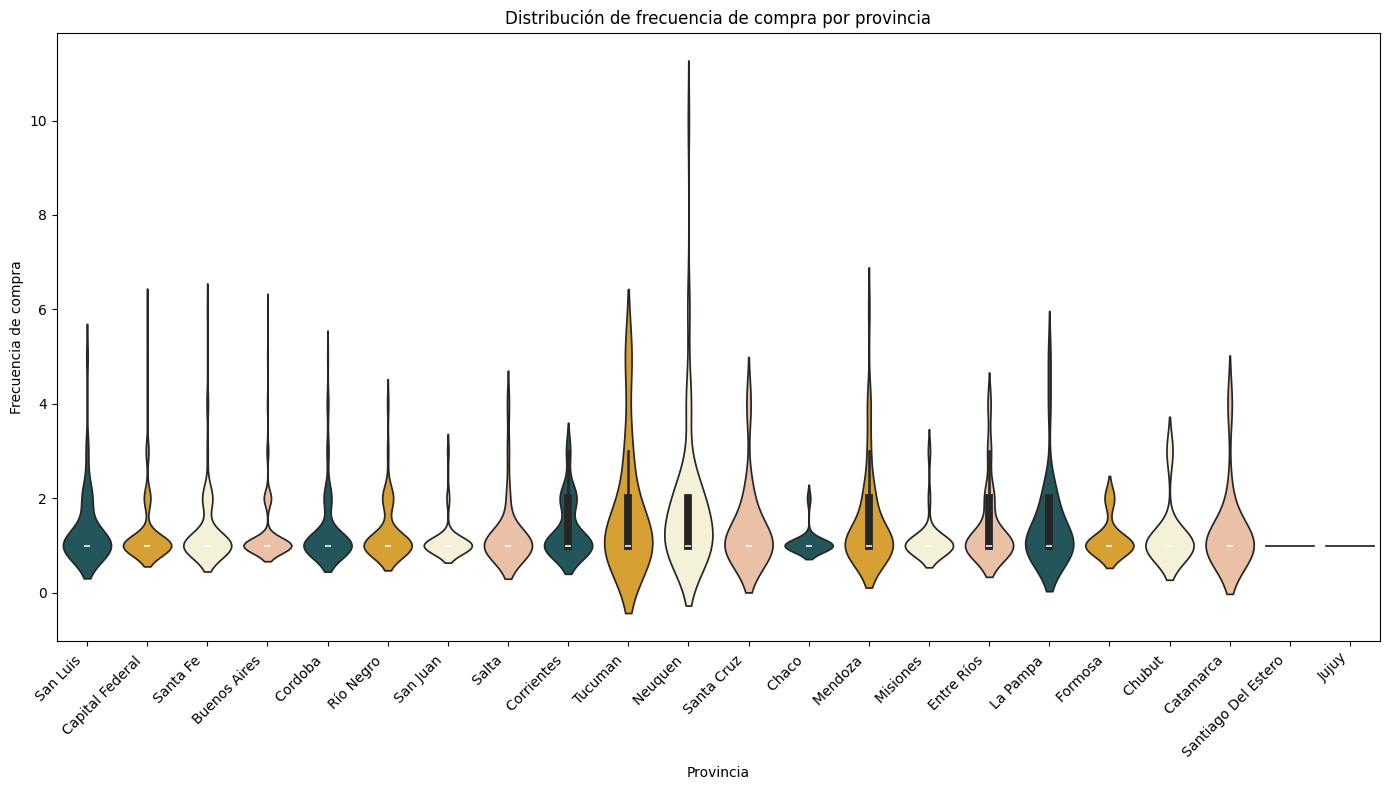

In [37]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=frecuencia_clientes, x='provincia', y='frecuencia_compra', palette=['#1a5e63', '#f3a916', '#faf4d3', '#f6be9a'])
plt.xticks(rotation=45, ha='right')
plt.title('Distribuci√≥n de frecuencia de compra por provincia')
plt.ylabel('Frecuencia de compra')
plt.xlabel('Provincia')
plt.tight_layout()
plt.show()



Se observan en provincias como Tucum√°n, Neuqu√©n, Santa Cruz y Misiones mayor fidelidad. En provincias como Jujuy, Catamarca y Santiago del Estero observa frecuencia m√°s baja y homog√©nea.

# **An√°lisis exploratorio de la base de datos de clientes de la web**

In [38]:
#Veo el tama√±o del dataset de clientes de la web
dfweb.shape

(963, 5)

In [39]:
#Veo que tipo de datos para cada columna
dfweb.dtypes

Apellido         object
Primer nombre    object
CP               object
LOCALIDAD        object
PROVINCIA        object
dtype: object

In [40]:
#Transformo la columna de Codigo postal de object a intenger
dfweb['CP'] = pd.to_numeric(dfweb['CP'], errors='coerce').astype('Int64')


In [41]:
print(dfweb['PROVINCIA'].unique())


['Buenos Aires' 'Mendoza' 'CABA' 'Santa Fe' 'CHUBUT' 'Tucuman' 'Usuahia'
 'Neuqu√©n' 'Santiago del estero' 'Chubut' 'C√≥rdoba' 'Santa Cruz'
 'Corrientes' 'Avellaneda' 'buenos Aires' 'San Luis' 'R√≠o Negro' 'C√≥doba'
 'La Pampa' 'CHACO' 'entre rios' 'Misiones' 'Entre Rios' 'Cordoba'
 'Quilmes' 'Chaco' 'Santiago del Estero' 'Entre R√≠os' nan 'Bs As' 'Bs.A.'
 'Rosario' 'San isidro' 'Santa F√©' 'Tucum√°n' '3 C' 'MENDOZA' 'SAN ISIDRO'
 'Catamarca' 'Bs.As' 'Jujuy' 'Wilde' 'San Juan' 'Mar del Plata'
 'Ballester' 'Tres de Febrero' 'Salta' 'Formosa' 'Capital Federal'
 'Entre R√¨os']


In [42]:
mapeo_provincias = {
    'Buenos Aires': 'Buenos Aires',
    'buenos Aires': 'Buenos Aires',
    'Bs As': 'Buenos Aires',
    'Bs.A.': 'Buenos Aires',
    'Bs.As': 'Buenos Aires',

    'CABA': 'CABA',
    'Capital Federal': 'CABA',

    'Cordoba': 'C√≥rdoba',
    'C√≥rdoba': 'C√≥rdoba',
    'C√≥doba': 'C√≥rdoba',

    'Entre Rios': 'Entre R√≠os',
    'entre rios': 'Entre R√≠os',
    'Entre R√¨os': 'Entre R√≠os',

    'Santa F√©': 'Santa Fe',

    'Chaco': 'Chaco',
    'CHACO': 'Chaco',

    'Chubut': 'Chubut',
    'CHUBUT': 'Chubut',

    'MENDOZA': 'Mendoza',

    'San isidro': 'Buenos Aires',
    'SAN ISIDRO': 'Buenos Aires',
    'Avellaneda': 'Buenos Aires',
    'Quilmes': 'Buenos Aires',
    'Rosario': 'Santa Fe',
    'Wilde': 'Buenos Aires',
    'Ballester': 'Buenos Aires',
    'Mar del Plata': 'Buenos Aires',
    'Tres de Febrero': 'Buenos Aires',
    '3 C': 'Buenos Aires',

    'Santiago del estero': 'Santiago del Estero',

    'Mendoza': 'Mendoza',
    'Tucum√°n': 'Tucum√°n',
    'Tucuman': 'Tucum√°n',
    'Neuqu√©n': 'Neuqu√©n',
    'Santa Cruz': 'Santa Cruz',
    'Corrientes': 'Corrientes',
    'San Luis': 'San Luis',
    'R√≠o Negro': 'R√≠o Negro',
    'La Pampa': 'La Pampa',
    'Misiones': 'Misiones',
    'San Juan': 'San Juan',
    'Salta': 'Salta',
    'Formosa': 'Formosa',
    'Jujuy': 'Jujuy',
    'Catamarca': 'Catamarca',
    'Usuahia' : 'Tierra del fuego'
}


In [43]:
dfweb['PROVINCIA'] = dfweb['PROVINCIA'].map(lambda x: mapeo_provincias.get(x, x))


In [44]:
print(dfweb['PROVINCIA'].unique())


['Buenos Aires' 'Mendoza' 'CABA' 'Santa Fe' 'Chubut' 'Tucum√°n'
 'Tierra del fuego' 'Neuqu√©n' 'Santiago del Estero' 'C√≥rdoba' 'Santa Cruz'
 'Corrientes' 'San Luis' 'R√≠o Negro' 'La Pampa' 'Chaco' 'Entre R√≠os'
 'Misiones' nan 'Catamarca' 'Jujuy' 'San Juan' 'Salta' 'Formosa']


Si bien esta base de datos no contiene informaci√≥n directa sobre las ventas, puedo establecer una relaci√≥n entre la provincia y la cantidad de clientes. Este an√°lisis permite tener un acercamiento al comportamiento de las ventas en el sitio web. Sin embargo, es importante destacar que no es completamente fiable, ya que un mismo cliente podr√≠a haber realizado m√∫ltiples compras y/o adquirido varias prendas. Aun as√≠, si se observa una tendencia clara en la distribuci√≥n de clientes por provincia, puede aportar informaci√≥n valiosa para contrastar con la realidad de las ventas mediante Mercadolibre

In [45]:
# Relaci√≥n provincia / clientes
clientes_por_provincia = dfweb.groupby('PROVINCIA').size().reset_index(name='Cantidad_clientes')

clientes_por_provincia = clientes_por_provincia.sort_values(by='Cantidad_clientes', ascending=False)

clientes_por_provincia


PROVINCIA  Cantidad_clientes
0          Buenos Aires                386
1                  CABA                191
19             Santa Fe                 63
6               C√≥rdoba                 23
11              Mendoza                 18
7            Entre R√≠os                 17
4                Chubut                 14
14            R√≠o Negro                  9
13              Neuqu√©n                  6
10             La Pampa                  6
3                 Chaco                  5
22              Tucum√°n                  4
5            Corrientes                  4
18           Santa Cruz                  4
12             Misiones                  4
9                 Jujuy                  3
20  Santiago del Estero                  2
17             San Luis                  2
15                Salta                  2
16             San Juan                  2
2             Catamarca                  1
8               Formosa                  1
21     Tierra del fuego                  1

/tmp/ipython-input-2370843367.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clientes_top10, x='Cantidad_clientes', y='PROVINCIA', palette=['#1a5e63', '#f3a916', '#faf4d3', '#f6be9a'])
/tmp/ipython-input-2370843367.py:5: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=clientes_top10, x='Cantidad_clientes', y='PROVINCIA', palette=['#1a5e63', '#f3a916', '#faf4d3', '#f6be9a'])


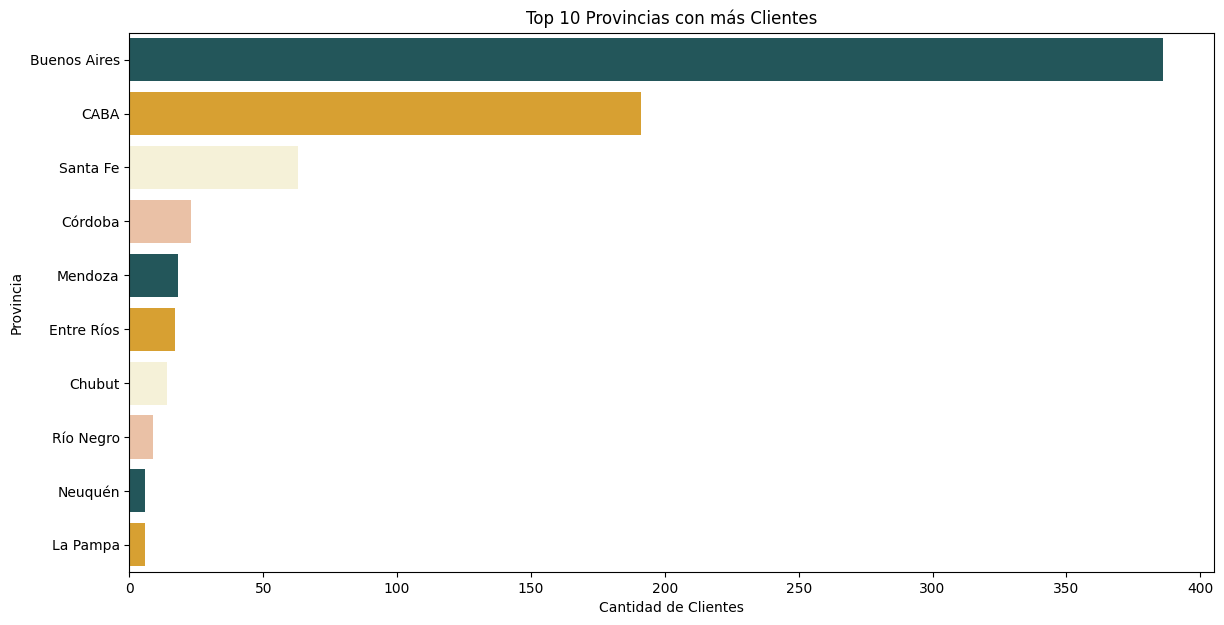

In [46]:
# Tomo las 10 provincias con m√°s clientes para que el grafico se comprenda mejor
clientes_top10 = clientes_por_provincia.head(10)

plt.figure(figsize=(14, 7))
sns.barplot(data=clientes_top10, x='Cantidad_clientes', y='PROVINCIA', palette=['#1a5e63', '#f3a916', '#faf4d3', '#f6be9a'])
plt.title('Top 10 Provincias con m√°s Clientes')
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Provincia')
plt.show()


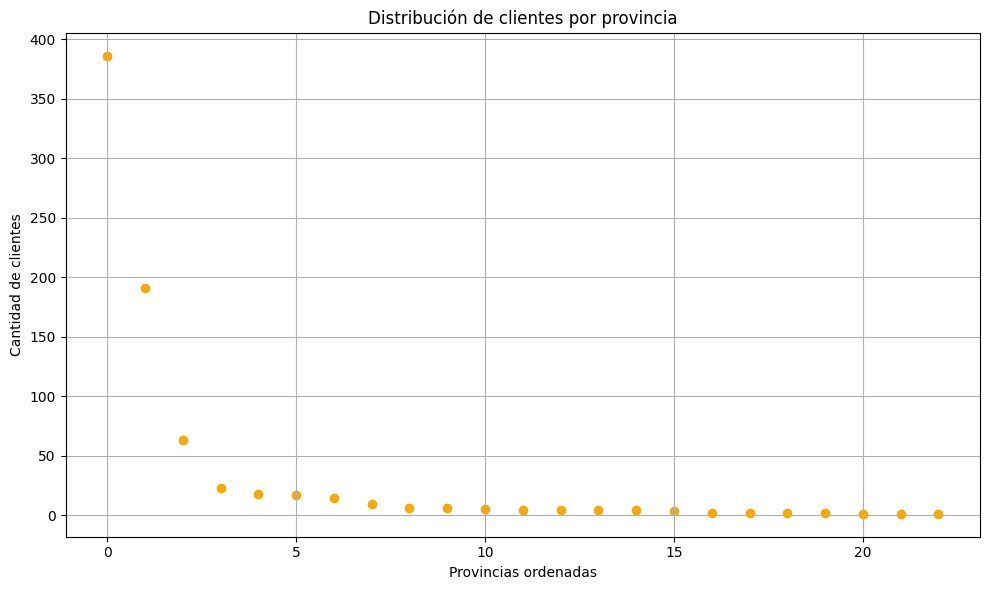

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(clientes_por_provincia)),
            clientes_por_provincia['Cantidad_clientes'],
            color=colores_marca[1])

plt.xlabel('Provincias ordenadas')
plt.ylabel('Cantidad de clientes')
plt.title('Distribuci√≥n de clientes por provincia')
plt.grid(True)
plt.tight_layout()
plt.show()



Se observa un comportamiento similar al de la plataforma de mercadolibre en terminos absolutos, sin tener en cuenta la densidad poblacional.

# Insights

üëç 1. Clientes con mayor frecuencia de compra (fidelidad)

Se identificaron provincias donde los clientes realizan compras con mayor
frecuencia, lo que refleja altos niveles de fidelidad. Las provincias destacadas son Tucum√°n, Neuqu√©n, Santa Cruz, Misiones y Mendoza. Esto sugiere una oportunidad para potenciar el crecimiento del mercado en estas zonas mediante estrategias de marketing dirigidas a nuevos clientes, aprovechando la alta fidelizaci√≥n ya existente.

üëç 2. Provincias con alta frecuencia promedio no necesariamente tienen mayores ingresos totales.

 Aunque provincias como Buenos Aires y Capital Federal concentran los ingresos totales m√°s altos, no tienen la frecuencia promedio de compra m√°s elevada. Esto sugiere que existe un margen para desarrollar estrategias de fidelizaci√≥n y recompra en estas √°reas, aprovechando la gran cantidad de clientes.

üëç 3. Preferencia por talles grandes

Los datos revelan una clara preferencia por los talles grandes. Los talles m√°s elegidos corresponden a 2XL, 3XL, 4XL y 5XL, lo cual es relevante para orientar la producci√≥n, el stock y las campa√±as de marketing.

# **Modelo de aprendizaje no supervisado**

Opte por el modelo de aprendizaje no supervisado debido que mi dataset no cuenta con una variable objetivo predefinida para entrenar al modelo como podr√≠a ser, por ejemplo, clientes leales o no leales, clientes frecuentes o clientes infrecuentes. Al intentar encontrar patrones que son posibles solo si son analizados con m√∫ltiples variables (frecuencia de compra, ingresos (gastos), talles y colores) m√©todos como el K-means y el Clustering jerarquico resultan √∫tiles para encontrar similitudes en los patrones.

M√©todo Cl√∫ster (k-means): Segmentacion de clientes

Busco con la implementaci√≥n del m√©todo evaluar dos de los objetivos del presente trabajo. Cosidero que a traves de una segmentaci√≥n de clientes basada, principalmete, en la frecuencia de compra y talle elegido, voy a poder visualizar:

Cu√°les son los talles m√°s vendidos de la marca "Tochana" en el mercado argentino.
Identificar posibles oportunidades de crecimiento y expansi√≥n para la marca en funci√≥n del an√°lisis de los distintos cluster de clientes para lograr estrategias focalizadas.
Procedo a evaluar el rendimiento del modelo de segmentaci√≥n de clientes basado en el algoritmo K-Means, con k=4 (tras aplicar el m√©todo del codo).

In [48]:
print(df_ventas.columns)
print(df_clientes.columns)
print(df_ciudad.columns)
print(df_provincia.columns)

Index(['id_venta', 'id_clientes', 'ingresos por productos (ars)',
       'cargo por venta e impuestos', 'costos de env√≠o', 'total (ars)',
       'id_publicaciones', 'id_color', 'id_talle'],
      dtype='object')
Index(['id_cliente', 'primer nombre', 'segundo nombre', 'apellido',
       'id_ciudad', 'c√≥digo postal'],
      dtype='object')
Index(['id_ciudad', 'ciudad', 'id_provincia'], dtype='object')
Index(['id_provincia', 'provincia'], dtype='object')


In [49]:
# Unifico informacion de clientes y ventas
df_segmentacion = df_ventas.merge(
    df_clientes, left_on='id_clientes', right_on='id_cliente', how='inner'
).merge(
    df_ciudad, on='id_ciudad', how='inner'
).merge(
    df_provincia, on='id_provincia', how='inner'
)


In [50]:
print(df_segmentacion.columns) # Me aseguro que se hayan unido los campos correctos

Index(['id_venta', 'id_clientes', 'ingresos por productos (ars)',
       'cargo por venta e impuestos', 'costos de env√≠o', 'total (ars)',
       'id_publicaciones', 'id_color', 'id_talle', 'id_cliente',
       'primer nombre', 'segundo nombre', 'apellido', 'id_ciudad',
       'c√≥digo postal', 'ciudad', 'id_provincia', 'provincia'],
      dtype='object')


In [51]:
df_segmentacion = df_segmentacion.groupby('id_clientes').agg({
    'total (ars)': 'sum',
    'id_venta': 'count',
    'id_talle': lambda x: x.mode()[0] if not x.isnull().all() else np.nan,
    'id_color': lambda x: x.mode()[0] if not x.isnull().all() else np.nan,
    'provincia': 'first'
}).reset_index()

df_segmentacion.rename(columns={
    'total (ars)': 'ingresos_totales',
    'id_venta': 'frecuencia_compra',
    'id_talle': 'talle_preferido',
    'id_color': 'color_preferido'
}, inplace=True)

In [52]:
variables_cluster = df_segmentacion[['ingresos_totales', 'frecuencia_compra']]
# Escalo las variables
scaler = StandardScaler()
variables_escaladas = scaler.fit_transform(variables_cluster)

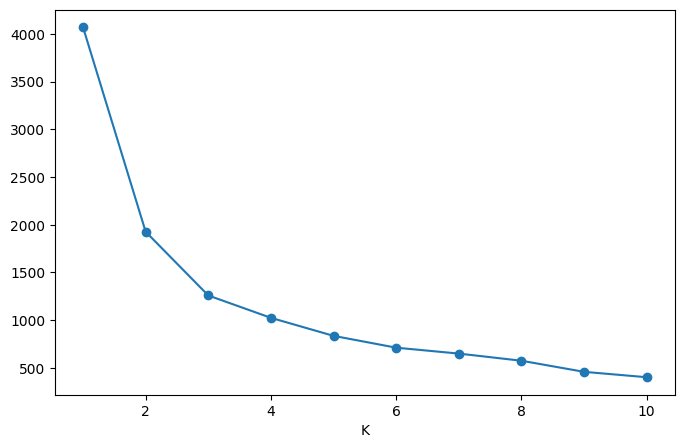

In [53]:
#Intento determinar utilizando el metodo codo el n√∫mero √≥ptimo de cl√∫steres (K-means)
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(variables_escaladas)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('K')
plt.show()


In [54]:
#Eleg√≠ 4 como valor √≥ptimo de K para la utiliaci√≥n de kmeans debido a que en el valor 4 se puede apreciar que comienza el equilibrio
k_optimo = 4
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df_segmentacion['Cluster'] = kmeans.fit_predict(variables_escaladas)

In [55]:
#Visualizo el resumen de los cl√∫steres
resumen_cluster = df_segmentacion.groupby('Cluster').agg({
    'ingresos_totales': ['mean', 'median'],
    'frecuencia_compra': ['mean', 'median'],
    'talle_preferido': lambda x: x.mode()[0],
    'color_preferido': lambda x: x.mode()[0]
})

print(resumen_cluster)

        ingresos_totales             frecuencia_compra        talle_preferido  \
                    mean      median              mean median        <lambda>   
Cluster                                                                         
0           15508.861281   16018.120          1.015142    1.0             8.0   
1           47355.334149   47371.640          3.372340    3.0             8.0   
2          118766.011667  111323.245          4.666667    5.0             8.0   
3           38417.799202   37071.350          1.760736    2.0             8.0   

        color_preferido  
               <lambda>  
Cluster                  
0                   6.0  
1                   6.0  
2                   6.0  
3                   6.0  


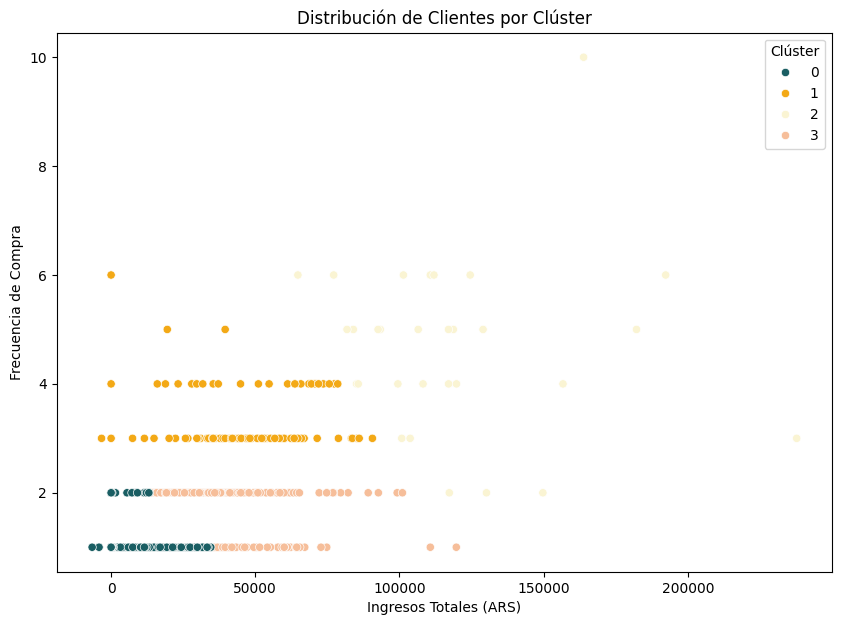

In [56]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_segmentacion, x='ingresos_totales', y='frecuencia_compra', hue='Cluster', palette=colores_marca)
plt.title('Distribuci√≥n de Clientes por Cl√∫ster')
plt.xlabel('Ingresos Totales (ARS)')
plt.ylabel('Frecuencia de Compra')
plt.legend(title='Cl√∫ster')
plt.show()

Interpretaci√≥n por cl√∫ster:

Cluster 0: Ingresos totales: Bajo (promedio: 15,508.86 ARS). Frecuencia de compra: Muy baja (promedio: 1 compra por cliente). Talle y color preferido: Talle 8 y color 6. Interpretaci√≥n: Este cl√∫ster representa clientes espor√°dicos de bajo valor.

Cluster 1: Ingresos totales: Moderados (promedio: 47,355.33 ARS). Frecuencia de compra: Moderada (promedio: 3.37 compras por cliente). Talle y color preferido: Talle 8 y color 6. Interpretaci√≥n: Clientes leales con compras regulares y contribuci√≥n significativa al ingreso.

Cluster 2: Ingresos totales: Muy altos (promedio: 118,766.01 ARS). Frecuencia de compra: Alta (promedio: 4.67 compras por cliente). Talle y color preferido: Talle 8 y color 6. Interpretaci√≥n: Clientes premium o de alto valor que compran con mayor frecuencia.

Cluster 3: Ingresos totales: Intermedios (promedio: 38,417.80 ARS). Frecuencia de compra: Baja-moderada (promedio: 1.76 compras por cliente). Talle y color preferido: Talle 8 y color 6. Interpretaci√≥n: Clientes ocasionales, pero con un gasto mayor que el Cl√∫ster 0.

El talle m√°s elegido es el talle 8, siendo este el m√°s grande ofrecido por la marca.

In [57]:
print(f"Inercia intra-cluster (SSE): {kmeans.inertia_}")

Inercia intra-cluster (SSE): 1024.1353685206261


In [58]:
silhouette_avg = silhouette_score(variables_escaladas, kmeans.labels_)
print(f"Coeficiente de Silhouette: {silhouette_avg}")

Coeficiente de Silhouette: 0.6484475199611085


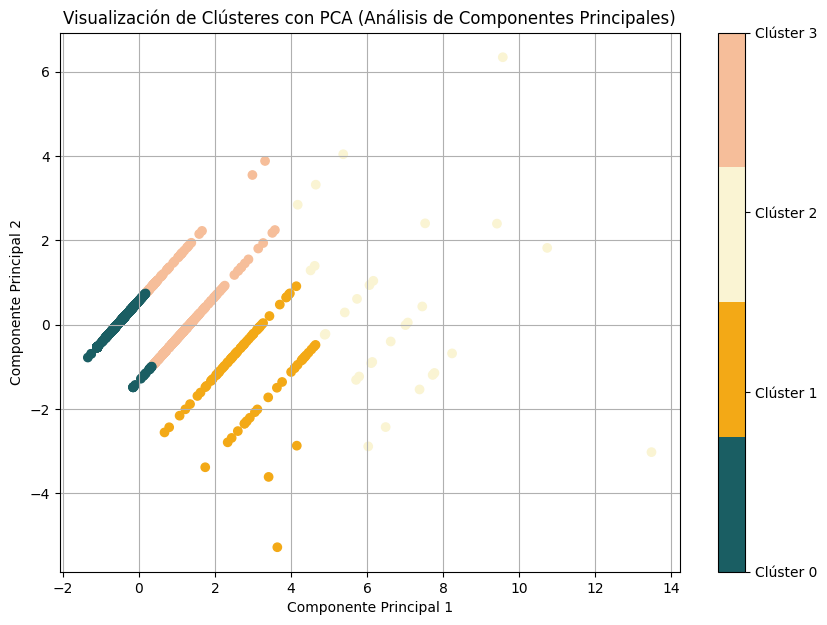

In [59]:
cmap = mcolors.ListedColormap(colores_marca)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(variables_escaladas)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=kmeans.labels_,
    cmap=cmap,
)
cbar = plt.colorbar(scatter, ticks=range(len(colores_marca)))
cbar.ax.set_yticklabels([f'Cl√∫ster {i}' for i in range(len(colores_marca))])
plt.title('Visualizaci√≥n de Cl√∫steres con PCA (An√°lisis de Componentes Principales)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

Analisis del m√©todo Cl√∫ster

M√©tricas de Evaluaci√≥n del m√©todo Cluster para la segmentacion de clientes


*  Inercia intra-cluster (SSE): El modelo tuvo un valor de inercia de 1024.13, lo cu√°l sugiere que los cl√∫steres generados tienen son aceptablemente compactos y consistentes.
*   Coeficiente de Silhouette: Al obtener como resultado 0.648 y ser √©ste mayor a 0.5, puedo inferir que los cl√∫steres estan separados entre s√≠ de forma correcta y, en consecuencia, son distinguibles entre ellos. Lo cu√°l significa que los valores dentro de cada uno son m√°s parecidos entre ellos que a los datos de otros cl√∫steres.
*   Gr√°fico de cl√∫steres con PCA: En el grafico obtenido se pueden visualizar cuatro cl√∫steres claramente diferenciados, inifiriendo nuevamente que la elecci√≥n de k=4 como el n√∫mero √≥ptimo de agrupamientos fue correcta. La clara separacion entre los cl√∫steres sugiere que las variables seleccionadas para el modelo (ingresos, frecuencia de compra, color y talle preferido) son adecuadas para distinguir comportamientos de cada grupo de clientes lo cu√°l indica que puede ser utilizado para dise√±ar estrategias de ventas focalizadas.

**Recomendaciones estrat√©gicas**

Cluster 2 representa una clara oportunidad para estrategias de fidelizaci√≥n  (programas exclusivos, acceso a nuevas colecciones antes que el publico general podria ser un catalogo preferencial mediante campa√±a de mail/whatsapp).

Cluster 1 puede beneficiarse de incentivos para aumentar la frecuencia (ej: combos, cupones por compras recurrentes).

Clusters 0 y 3 requieren acciones de remarketing para impulsar la recompra o aumentar el ticket (se pueden pensar combos o packs promocionales mediante campa√±a de mail focalizada para intenar recompra).

**M√©todo clustering jer√°rquico**

Utilizo el m√©todo de clustering jer√°rquico para poder visualizar el n√∫mero √≥ptimo de cl√∫steres que resulte del algoritmo del Dendrograma para contrastar con el resultado del m√©todo anterior. Utilic√© como criterio de enlace la t√©cnica de Ward para minimizar la varianza dentro de los cl√∫steres y as√≠ poder lograr grupos m√°s compactos que tengan una diferencia clara con el resto.

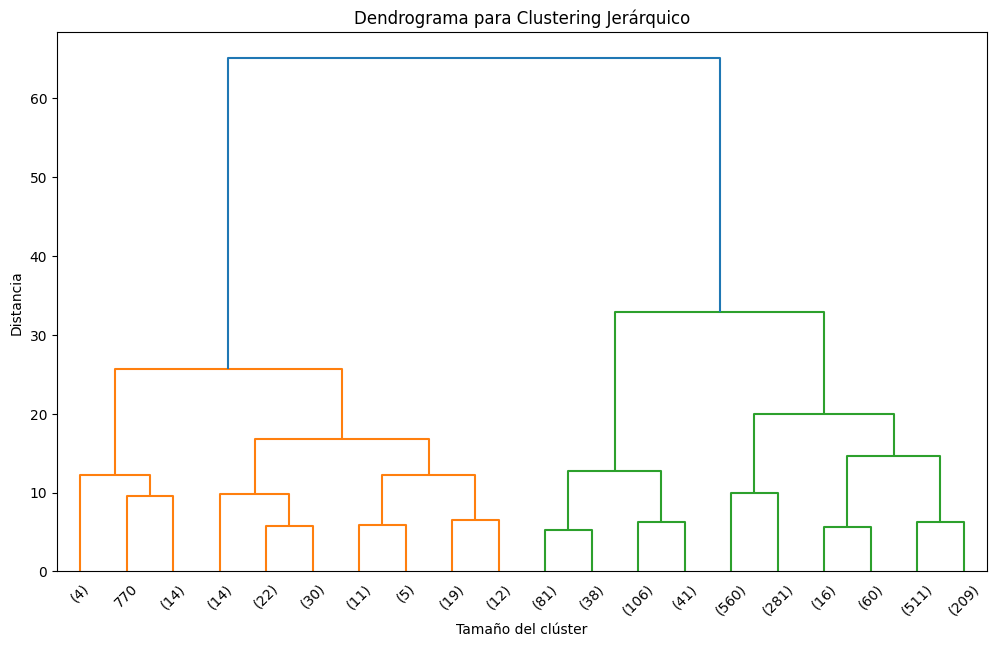

In [60]:
linkage_matrix = linkage(variables_escaladas, method='ward')

plt.figure(figsize=(12, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=45, leaf_font_size=10)
plt.title('Dendrograma para Clustering Jer√°rquico')
plt.xlabel('Tama√±o del cl√∫ster')
plt.ylabel('Distancia')
plt.show()

clustering_jerarquico = AgglomerativeClustering(n_clusters=4, linkage='ward')
clustering_jerarquico.fit(variables_escaladas)
df_segmentacion['Cluster_Jerarquico'] = clustering_jerarquico.labels_


Se observan dos grandes cl√∫steres principales que tienen una distancia grande el uno del otro lo cu√°l permite inferir que guardan entre s√≠ grandes diferencias. M√°s abajo se puede ver una ramificaci√≥n de cada uno en dos subgrupos, que permite dividir a los clientes en cuatro cl√∫stures.

Analizando ambos m√©todos utilizados es coincidente la obtenci√≥n de cuatro grupos de compradores diferenciados entre s√≠.

In [61]:
#Visualizo el res√∫men de los cl√∫steres generados
resumen_jerarquico = df_segmentacion.groupby('Cluster_Jerarquico').agg({
    'ingresos_totales': ['mean', 'median'],
    'frecuencia_compra': ['mean', 'median'],
    'talle_preferido': lambda x: x.mode()[0],
    'color_preferido': lambda x: x.mode()[0]
})

print(resumen_jerarquico)

                   ingresos_totales            frecuencia_compra         \
                               mean     median              mean median   
Cluster_Jerarquico                                                        
0                      17010.054337   16273.53          1.000000    1.0   
1                      60068.541504   59450.92          3.203540    3.0   
2                      30604.542331   30718.10          2.018797    2.0   
3                     123479.843684  111951.91          5.473684    5.0   

                   talle_preferido color_preferido  
                          <lambda>        <lambda>  
Cluster_Jerarquico                                  
0                              8.0             6.0  
1                              8.0             6.0  
2                              8.0             6.0  
3                              6.0             6.0  


In [62]:
n_clusters = 4 #Elijo nuevamente cortar en 4 cl√∫ster para el an√°lisis
labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')

intra_cluster_distances = []
for cluster in range(1, n_clusters + 1):
    cluster_points = variables_escaladas[labels == cluster]
    distances = pdist(cluster_points)
    intra_cluster_distances.append(distances.mean())

print("Distancias intra-cluster:", intra_cluster_distances)


Distancias intra-cluster: [np.float64(3.3882866088890613), np.float64(2.155327126172041), np.float64(0.8141572938548101), np.float64(0.5224240201250625)]


In [63]:
centroides = []
for cluster in range(1, n_clusters + 1):
    cluster_points = variables_escaladas[labels == cluster]
    centroides.append(cluster_points.mean(axis=0))

inter_cluster_distances = []
for i in range(len(centroides)):
    for j in range(i + 1, len(centroides)):
        dist = euclidean(centroides[i], centroides[j])
        inter_cluster_distances.append(dist)

print("Distancias inter-cluster:", inter_cluster_distances)

Distancias inter-cluster: [4.498152713409024, 6.7074065796496205, 8.179812081600506, 2.2117497688530947, 3.7134763477499524, 1.539858222200377]


In [64]:
linkage_matrix = linkage(variables_escaladas, method='ward')
labels = fcluster(linkage_matrix, t=4, criterion='maxclust')

In [65]:
silhouette_avg = silhouette_score(variables_escaladas, labels)
print("Coeficiente de Silhouette:", silhouette_avg)

Coeficiente de Silhouette: 0.6428901354734259


Analisis del m√©todo clustering jer√°rquico

M√©tricas de Evaluaci√≥n del m√©todo Cluster para la segmentacion de clientes:



*   Coeficiente de Silhouette: Se obtuvo como resultado 0.642 siendo √©ste muy similar al obtenido por el m√©todo no jer√°rquico.
*  Distancia intra-cl√∫ster: Cl√∫ster 1: 3.39 Cl√∫ster 2: 2.16 Cl√∫ster 3: 0.81 Cl√∫ster 4: 0.52. Las distancias internas de cada cl√∫ster son chicas, sin embargo, se puede visualizar que los grupos 3 y 4 son m√°s compactos y en consecuecia m√°s homog√©neos.
* Distancia inter-cl√∫ster: Entre Cl√∫ster 1 y 2: 4.50 Entre Cl√∫ster 1 y 3: 6.71 Entre Cl√∫ster 1 y 4: 8.18 Entre Cl√∫ster 2 y 3: 2.21 Entre Cl√∫ster 2 y 4: 3.71 Entre Cl√∫ster 3 y 4: 1.54. En esta m√©trica se observan principalmente dos situaciones. Las mayores distancias se obtuvieron entre el Cl√∫ster 1 y el Cl√∫ster 4, y entre el Cl√∫ster 1 y el Cl√∫ster 3. Esto indica que estos cl√∫steres tienen una buena diferenciaci√≥n entre sus puntos. Por otro lado, las distancias m√°s chicas se visualizan entre el Cl√∫ster 3 y el Cl√∫ster 4 y el Cl√∫ster 2 y el Cl√∫ster 3, lo que indica que estos cl√∫steres est√°n m√°s cercanos entre s√≠ y podr√≠an tener caracter√≠sticas similares. La distancia entre el 3 y el 4 requiere un mayor an√°lisis, contemplando la posibilidad de reducir el n√∫mero de cl√∫steres.

# Modelo de aprendizaje no supervisado

En esta instancia del trabajo y con el objetivo de enriquecer el an√°lisis y avanzar en la comprensi√≥n del comportamiento de los clientes, opte por  implementar un modelo de aprendizaje supervisado utilizando el m√©todo de √°rbol de decisi√≥n.

Este enfoque se diferencia de los algoritmos de aprendizaje no supervisado (como K-Means o clustering jer√°rquico), ya que en este caso se dispone de una variable objetivo conocida que permite al modelo aprender relaciones y patrones espec√≠ficos en los datos. Busco con esto, predecir si un cliente es valioso o no valioso, es decir, si genera ingresos totales por encima de la mediana del dataset. Esta clasificaci√≥n permite identificar a los clientes facilitando el dise√±o de estrategias de fidelizaci√≥n o campa√±as espec√≠ficas para retenerlos.

In [66]:
#Creo una variable para ver el promedio gastado por compra para cada cliente
df_segmentacion['ticket_promedio'] = df_segmentacion['ingresos_totales'] / df_segmentacion['frecuencia_compra']


In [67]:
#Creo una categoria binaria para clientes valiosos o no, que va a depender de si su ingreso total esta por encima de la mediana
df_segmentacion['cliente_valioso'] = (df_segmentacion['ingresos_totales'] > df_segmentacion['ingresos_totales'].median()).astype(int)

In [68]:
#Entreno un modelo de clasificaci√≥n (√°rbol de decisi√≥n) para predecir si el cliente es o no valioso
X = df_segmentacion[['frecuencia_compra', 'ticket_promedio']].fillna(0)
y = df_segmentacion['cliente_valioso']

clf = DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X, y, cv=5) #Utilizo la tecnica de validaci√≥n cruzada dividiendo los datos del dataset en 5 partes, donde se entrenan 4 y se eval√∫a en 1
print("Accuracy promedio con cross-val:", scores.mean())


Accuracy promedio con cross-val: 0.9926289926289927


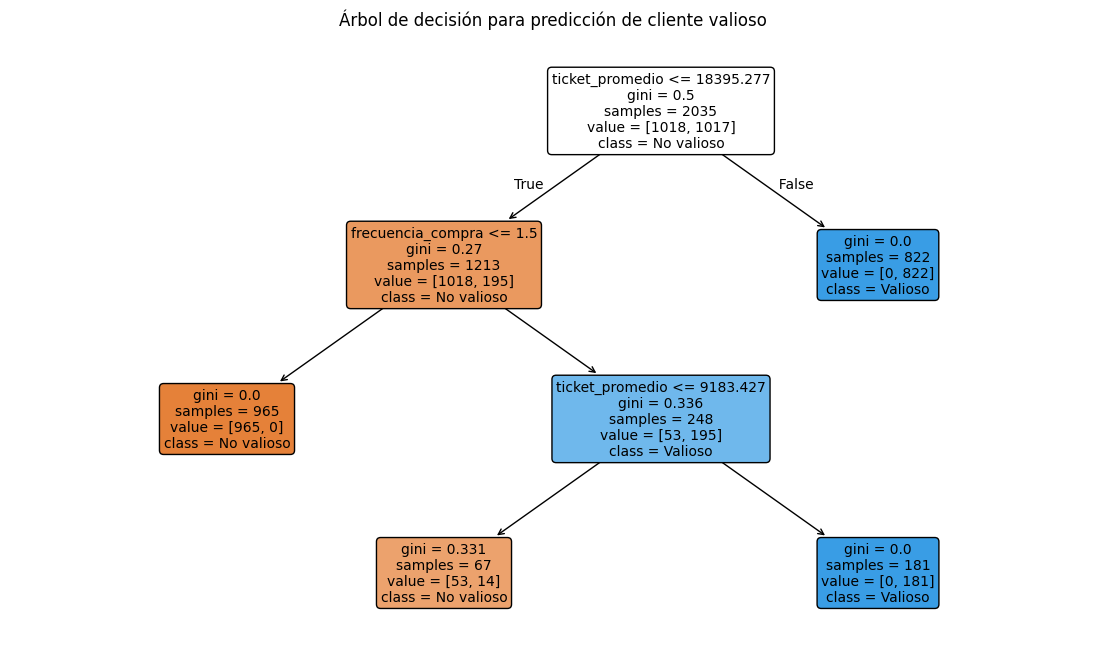

In [69]:
# Grafico arbol de decisi√≥n
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(14,8))
plot_tree(clf,
          feature_names=['frecuencia_compra', 'ticket_promedio'],
          class_names=['No valioso', 'Valioso'],
          filled=True, rounded=True, fontsize=10)
plt.title("√Årbol de decisi√≥n para predicci√≥n de cliente valioso")
plt.show()


Debido a la magnitud y complejidad moderada de mi dataset opte por utilizar el Grid Search CV como m√©todo de optimizaci√≥n de hiperparametros del arbol con el objetivo de mejorar la capacidad predictiva del modelo

In [70]:
#Defino la grilla de hiperpar√°metros a testear
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Creo el √°rbol de decisi√≥n
clf = DecisionTreeClassifier(random_state=42)

#Configuro el GridSearch con validaci√≥n cruzada
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

#Entreno el modelo
grid_search.fit(X, y)

print("Mejores hiperpar√°metros encontrados:", grid_search.best_params_)
print("Mejor accuracy promedio:", grid_search.best_score_)


Mejores hiperpar√°metros encontrados: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor accuracy promedio: 0.9970515970515971


Siendo que el arbol realizado anteriormente fue entrenado con una profundidad fija de 3 y analizando el resultado de los hiperparametros √≥ptimos particularmente el que ofrece que lo √≥ptimo es una profundidad de 5 voy a proceder a realizar nuevamente el m√©todo utilizando los mejores hiperpar√°metros

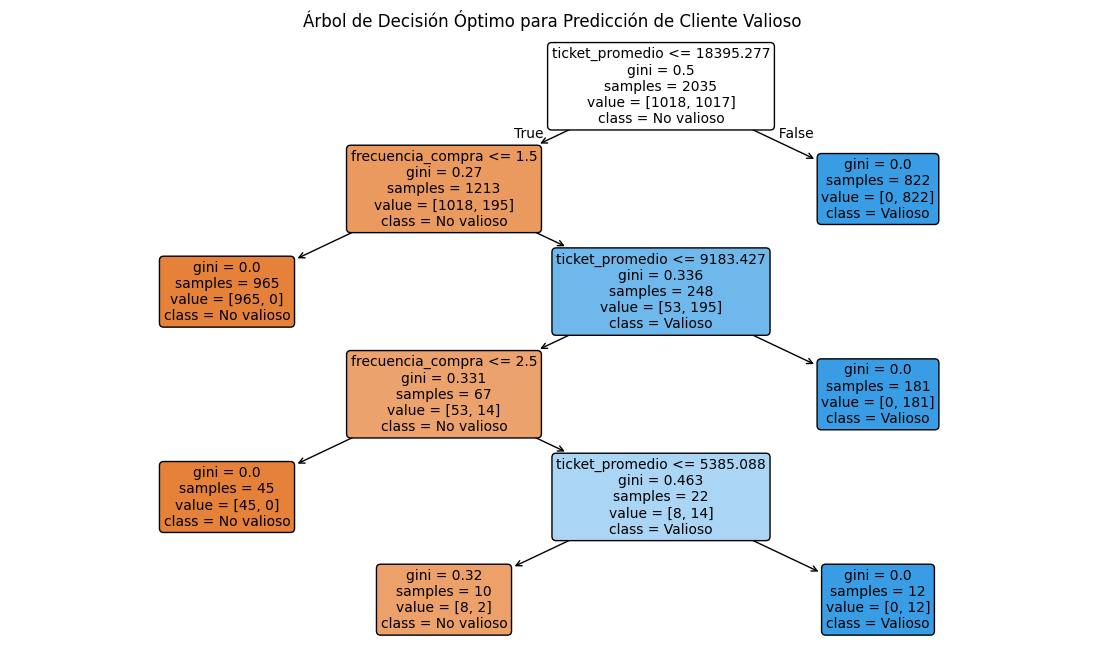

In [71]:
#Creo el Arbol con los mejores hiperpar√°metros
clf_optimo = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=42)
clf_optimo.fit(X, y)

plt.figure(figsize=(14, 8))
plot_tree(clf_optimo,
          feature_names=['frecuencia_compra', 'ticket_promedio'],
          class_names=['No valioso', 'Valioso'],
          filled=True, rounded=True, fontsize=10)
plt.title("√Årbol de Decisi√≥n √ìptimo para Predicci√≥n de Cliente Valioso")
plt.show()


Se observa un √°rbol m√°s profundo, mayores combinaciones entre la frecuencia de compra y el ticket promedio. Hay una divisi√≥n mas real entre clientes valiosos y no valiosos con mayor cantidad de reglas para definir estrategias.

Sin embargo se puede pensar en un posible overfitting por algunas razones. En primer lugar hay 5 nodos que tienen por resultado un Gini=0 que puede dar cuentas de demasiado ajuste. Por otro lado el valor de los tickets promedio son recortes muy espec√≠ficos que difieren de los valores m√°s generales existentes en los datos. Para finalizar, los dos √∫ltimos nodos tienen pocos datos (samples = 10 y samples = 12).

A ra√≠z de este riego de sobreajuste utilizo la matriz de confusi√≥n en test para realizar una evaluaci√≥n del modelo con el fin de verificar si las decisiones tambi√©n funcionan bien con datos no vistos.

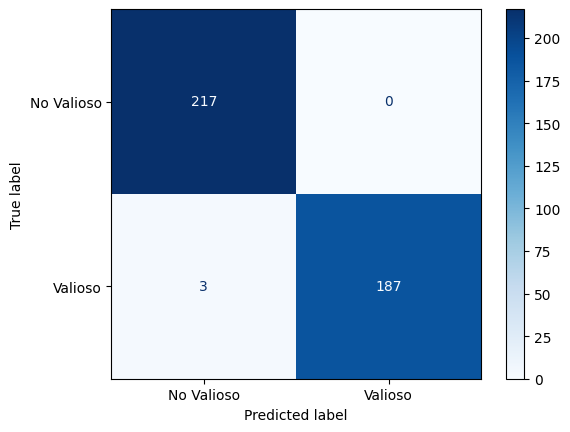

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Creo variables predictoras y objetivo
X = df_segmentacion[['frecuencia_compra', 'ticket_promedio']].fillna(0)
y = df_segmentacion['cliente_valioso']

# divisi√≥n en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Se entrena el modelo optimizado con los hiperpar√°metros encontrados
clf_optimizado = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=42)
clf_optimizado.fit(X_train, y_train)

#redicciones
y_pred = clf_optimizado.predict(X_test)

#Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No Valioso', 'Valioso'])

disp.plot(cmap='Blues')


**Interpretaci√≥n**:

TP (Verdaderos Positivos) = 187
Clientes valiosos correctamente identificados como tal.

TN (Verdaderos Negativos) = 217
Clientes no valiosos correctamente identificados.

FP (Falsos Positivos) = 0
No hay ning√∫n cliente no valioso que haya sido err√≥neamente clasificado como valioso.

FN (Falsos Negativos) = 3
Solo 3 clientes valiosos fueron mal clasificados como no valiosos.

El √°rbol de decisi√≥n optimizado mediante GridSearchCV logr√≥ una clasificaci√≥n precisa sobre el conjunto de prueba.

**‚ú® Recomendaciones Comerciales**

1. Segmentaci√≥n inclusiva y expansi√≥n de talles

üìå Insight: Los talles grandes (2XL a 5XL) presentan alta demanda, lo que revela un nicho de mercado poco atendido.

Recomendaci√≥n:
Desarrollar una l√≠nea visual que celebre la diversidad corporal. Incorporar modelos de talles reales en campa√±as y etiquetar productos destacados con etiquetas "pluszise" para mejorar la conversi√≥n. A nivel comercial, incrementar el stock y variedad de talles grandes, priorizando su presencia en productos con alta rotaci√≥n.

2. Reactivaci√≥n de la cartera en Buenos Aires y CABA

üìå Insight: Son las regiones con mayores ingresos, pero menor frecuencia de compra individual.

Recomendaci√≥n:
Dise√±ar un plan de fidelizaci√≥n espec√≠fico para clientes de estas zonas:

Programas de puntos por recompra.

Acceso anticipado a lanzamientos exclusivos.

Comunicaci√≥n personalizada v√≠a email o WhatsApp seg√∫n historial de compras.
Apuntar a transformar compradores ocasionales en clientes recurrentes.

3. Estrategia de crecimiento en provincias de alta fidelidad

üìå Insight: Provincias como Tucum√°n, Neuqu√©n, Santa Cruz y Misiones muestran clientes con alta frecuencia de compra, lo que indica una fuerte conexi√≥n con la marca.

Recomendaci√≥n:
Capitalizar este engagement con estrategias de expansi√≥n de base:

Campa√±as de referidos con beneficios para ambas partes.

Publicidad localizada

Activaciones espec√≠ficas: descuentos por c√≥digos regionales y env√≠os gratuitos.

4. Optimizaci√≥n log√≠stica regional y comunicaci√≥n por experiencia

üìå Insight: La dispersi√≥n geogr√°fica de la demanda obliga a pensar una estrategia log√≠stica diferencial.

Recomendaci√≥n:
Implementar un modelo log√≠stico h√≠brido:

Comunicar proactivamente plazos reales seg√∫n ubicaci√≥n durante la compra para reducir fricci√≥n y mejorar satisfacci√≥n.

Crear experiencias de entrega diferenciadas: empaque personalizado, seguimiento en tiempo real, o mensajes post-compra con foco emocional.